In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#import CSV files
avg_rental_price = pd.read_csv('Resources/medianAskingRent_All.csv')

# county_median = Path("../Desktop/median_county_income.csv")

county_median = pd.read_csv("Resources/estimate_of_median.csv")

# Read Data File and store into Pandas DataFrames
income_by_county = pd.read_csv("Resources/estimate_of_median.csv", header=1)

# # Define a list of counties you want to pull
nyc_income = income_by_county[income_by_county['Region Name'].isin(['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY'])]

census_2020 = pd.read_csv('Resources/census_2020.csv')
census_2010 = pd.read_csv('Resources/census_2010.csv')

# Rental Information

## Cleaning Dataset

In [3]:
avg_rental_price.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3020.0,3100.0,3100.0,3200.0,3195.0,...,4950.0,4897.0,4810.0,4850.0,4700.0,4712.0,4780.0,4814.0,4850.0,4895.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4500.0,4495.0,4495.0,4475.0,4350.0,4300.0,4335.0,4449.0,4435.0,4437.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,4000.0,4000.0,3995.0,4000.0,3995.0,4000.0,3950.0,3950.0,3995.0,3950.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2950.0,2900.0,2900.0,2850.0,2800.0,2800.0,2798.0,2800.0,2900.0,2895.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4402.0,4500.0,4500.0,4500.0,4450.0,4381.0,4250.0,4297.0,4300.0,4425.0


In [4]:
#Index by borough
new_df = avg_rental_price.set_index("areaType").drop(columns=['areaName'])
rent_price_borough = new_df.loc['borough'].set_index('Borough')
rent_price_df = rent_price_borough.T

rent_price_df.reset_index(drop=True, inplace=True)

yearly_rent = rent_price_df.groupby(rent_price_df.index // 12).mean()
yearly_rent = yearly_rent.iloc[:-4]

#create an array of years in order to set as index
years = [2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

yearly_rent.index= years 
yearly_rent = yearly_rent.round(2)
yearly_rent = yearly_rent.bfill()

print(yearly_rent)

Borough    Bronx  Brooklyn  Manhattan   Queens  Staten Island
2010     1562.08   2237.08    2867.75  1599.00        1562.86
2011     1492.83   2276.33    3098.92  1730.42        1562.86
2012     1485.33   2539.58    3189.17  2270.25        1562.86
2013     1497.92   2562.50    3214.75  2116.67        1618.83
2014     1533.25   2543.75    3217.25  2138.33        1657.92
2015     1534.92   2556.50    3313.33  2170.25        1690.08
2016     1652.50   2594.08    3328.58  2263.83        1988.75
2017     1736.08   2525.25    3265.17  2216.42        1924.25
2018     1868.33   2550.92    3262.50  2205.83        1885.75
2019     1920.42   2610.42    3435.75  2262.42        2017.75
2020     1974.33   2590.00    3157.58  2249.25        1945.42


## Line Graph of Rent by Boroughs and Linear Regression Charts

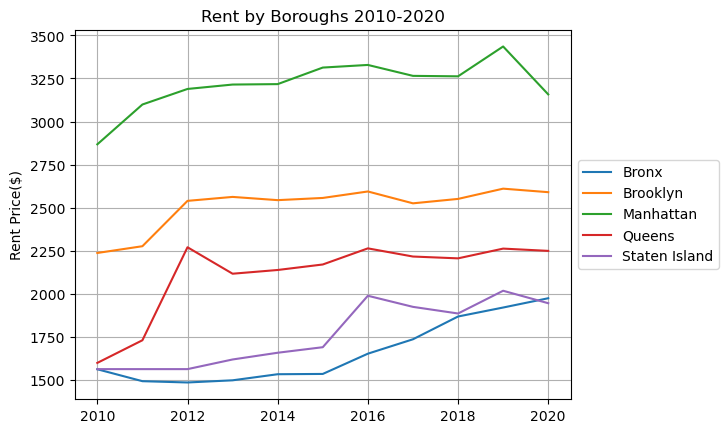

In [5]:
#Plot a line chart that shows the price of rent for each borough through the range of years
yearly_rent.plot(kind='line')
plt.grid(True)
plt.ylabel("Rent Price($)")
plt.title("Rent by Boroughs 2010-2020")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

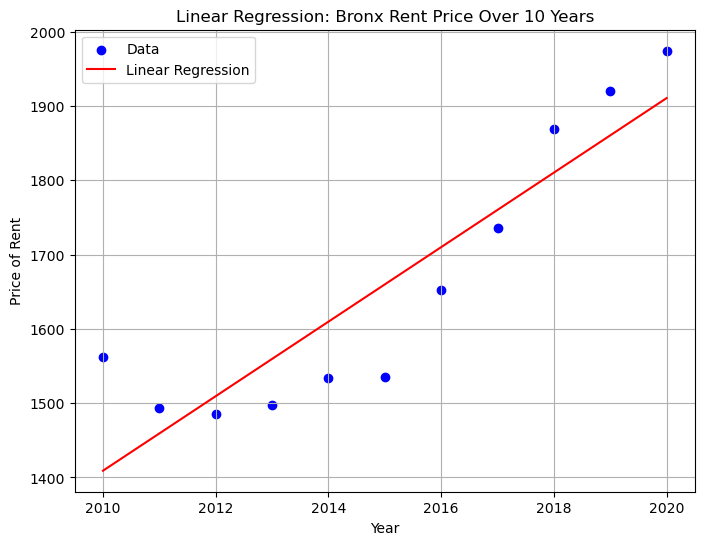

Slope: 50.14709090908846, Intercept: -99386.57090908599


In [6]:
# set x and y values
y_values = yearly_rent.index.values
x_values = yearly_rent['Bronx'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Bronx Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

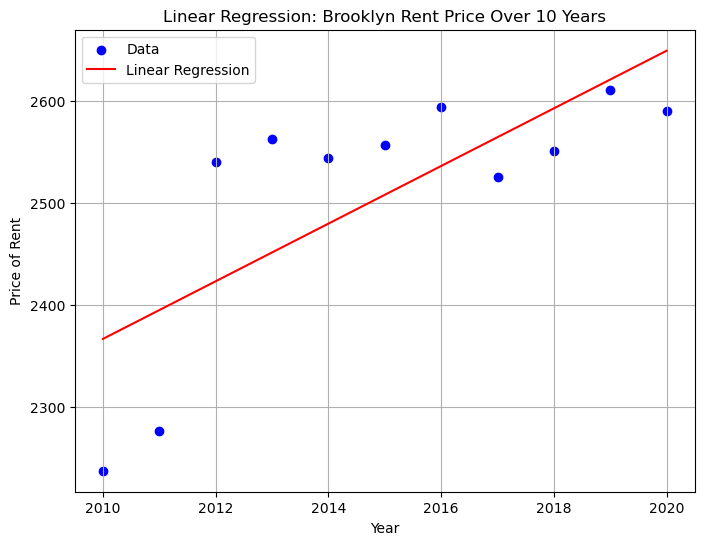

Slope: 28.28009090909108, Intercept: -54476.527727273075


In [7]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Brooklyn'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Brooklyn Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

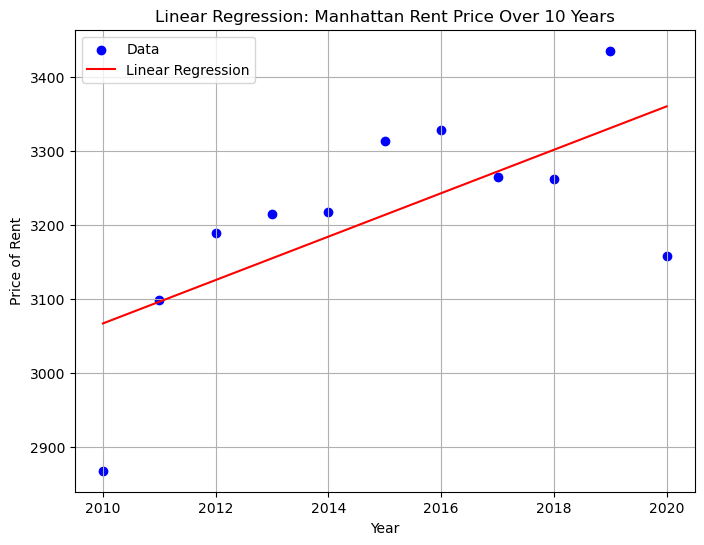

Slope: 29.351181818182198, Intercept: -55928.926818182576


In [8]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Manhattan'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Manhattan Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

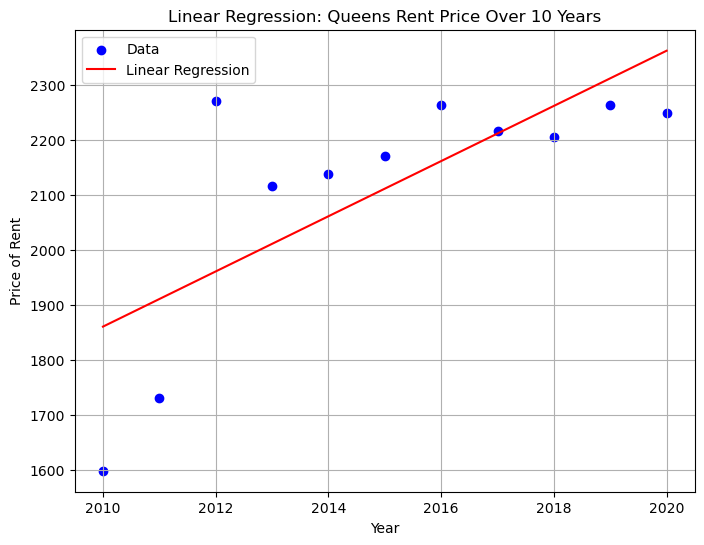

Slope: 50.0999090909096, Intercept: -98840.16500000103


In [9]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Queens'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Queens Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

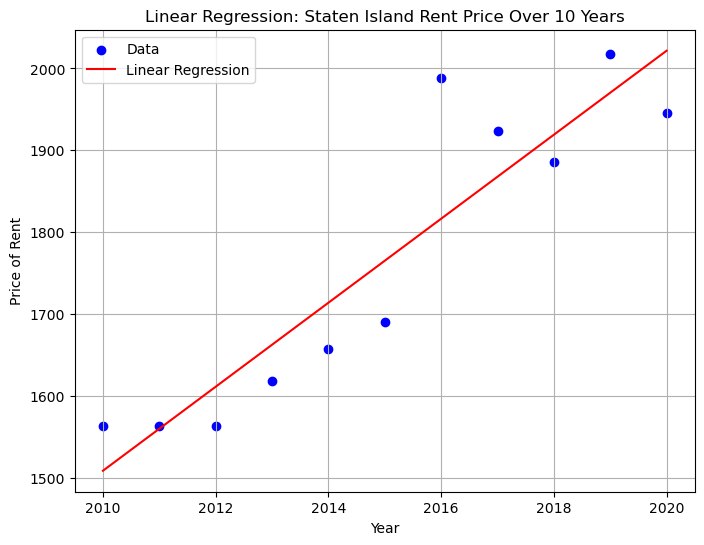

Slope: 51.297272727270325, Intercept: -101598.79272726791


In [10]:
# Sample data (replace with your actual data)
y_values = yearly_rent.index.values
x_values = yearly_rent['Staten Island'].values
# Perform linear regression
slope, intercept = np.polyfit(y_values, x_values, 1)
# Create the regression line
regression_line = slope * y_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_values, x_values, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price of Rent')
plt.title('Linear Regression: Staten Island Rent Price Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

## Change in Rent Year to Year

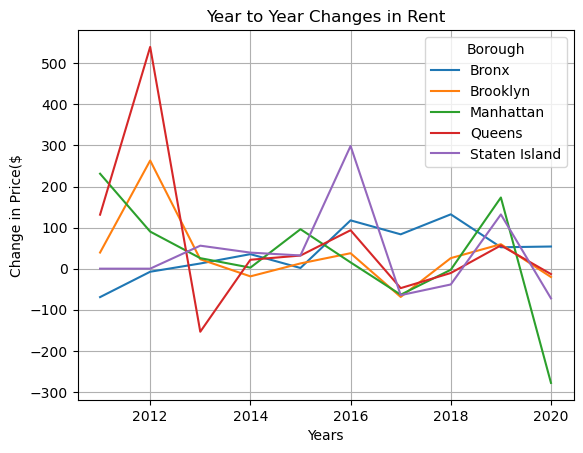

In [11]:
#plot the difference from year to year for each borough
yearly_change = yearly_rent.diff()

yearly_change.plot()
plt.title('Year to Year Changes in Rent')
plt.xlabel('Years')
plt.ylabel('Change in Price($')
plt.grid(True)
plt.show()

In [12]:
#empty dictionary to store percent change
percent_changes = {}

#itereate through each column
for column in yearly_rent.columns:
    #select first and last row of each column
    first_row = yearly_rent[column].iloc[0]
    last_row = yearly_rent[column].iloc[-1]
    
    #calculate the percent change between 2010 and 2020
    percent_change = ((last_row - first_row) / first_row) * 100
    

    #store percent change in the dictionary
    percent_changes[column] = percent_change

#create a new data frame
percent_changes_df = pd.DataFrame(percent_changes.items(), columns=['Borough', 'Percent Change 2010-2020'])
percent_changes_df['Percent Change 2010-2020'] = percent_changes_df['Percent Change 2010-2020'].map("{:.2f}%".format)

percent_changes_df

,Borough,Percent Change 2010-2020
0,Bronx,26.39%
1,Brooklyn,15.78%
2,Manhattan,10.11%
3,Queens,40.67%
4,Staten Island,24.48%


# Income Information

## Cleaned Data

In [13]:
nyc_income_years = ['Region Name', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01'] 
nyc_income = nyc_income[nyc_income_years]

#create new csv

nyc_median_yearly_income = pd.DataFrame(nyc_income)

# Write DataFrame to CSV file
nyc_median_yearly_income.to_csv('nyc_median_yearly_income.csv', index=False)

nyc_median_yearly_income

,Region Name,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
1830,"Bronx County, NY",32674.0,32137.0,32510.0,33079.0,33687.0,35102.0,37355.0,37377.0,38566.0,41470.0,44906.0
1851,"Kings County, NY",42047.0,42437.0,44850.0,47067.0,47547.0,51026.0,54793.0,56548.0,60862.0,66501.0,70390.0
1858,"New York County, NY",63188.0,65833.0,66739.0,71443.0,75459.0,75136.0,77214.0,84133.0,84610.0,93007.0,87745.0
1868,"Queens County, NY",52486.0,53124.0,54373.0,56307.0,56866.0,60241.0,61844.0,64046.0,68432.0,72975.0,78847.0
1870,"Richmond County, NY",69163.0,69436.0,70295.0,68621.0,70299.0,71058.0,75524.0,78466.0,79719.0,86624.0,81003.0


## NYC Boroughs & National: Line and Box & Whisker Graphs

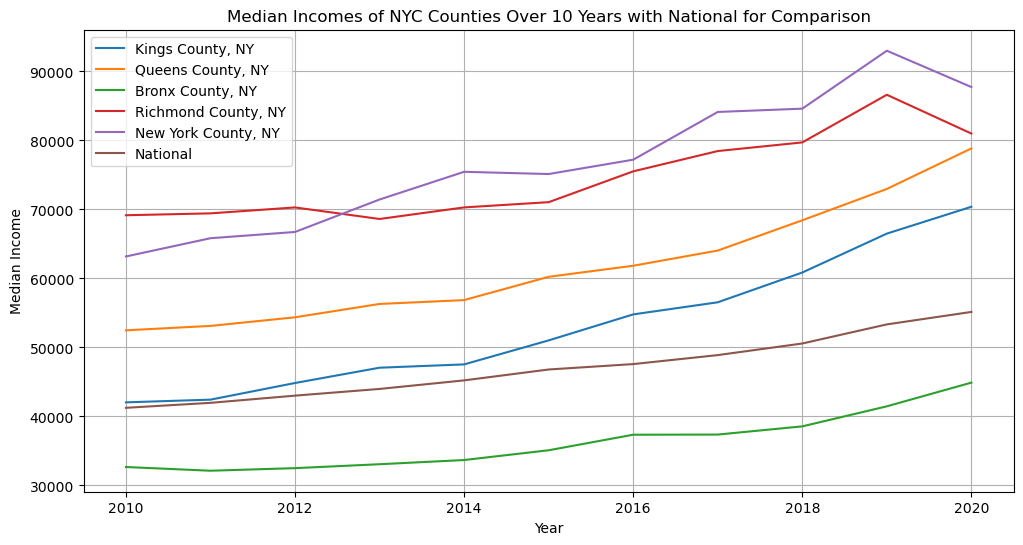

In [14]:
counties = ['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY', 'National']
years = list(range(2010, 2021))

# Sample median income data for each county over 10 years
median_incomes = {
    'Kings County, NY': [42047, 42437,	44850,	47067,	47547,	51026,	54793,	56548,	60862,	66501,	70390],
    'Queens County, NY': [52486, 53124,	54373,	56307,	56866,	60241,	61844,	64046,	68432,	72975,	78847],
    'Bronx County, NY': [32674,	32137,	32510,	33079,	33687,	35102,	37355,	37377,	38566,	41470,	44906],
    'Richmond County, NY': [69163,	69436,	70295,	68621,	70299,	71058,	75524,	78466,	79719,	86624,	81003],
    'New York County, NY': [63188,	65833,	66739,	71443,	75459,	75136,	77214,	84133,	84610,	93007,	87745],
    'National': [41255.5, 41974.5, 43018.5, 43990.5, 45229.0, 46807.0, 47592.0, 48893.0, 50576.0, 53344.0, 55150.0]
}

plt.show()

plt.figure(figsize=(12, 6))

for county in counties:
    plt.plot(years, median_incomes[county], label=county)

plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Incomes of NYC Counties Over 10 Years with National for Comparison')
plt.legend()
plt.grid(True)
plt.show()

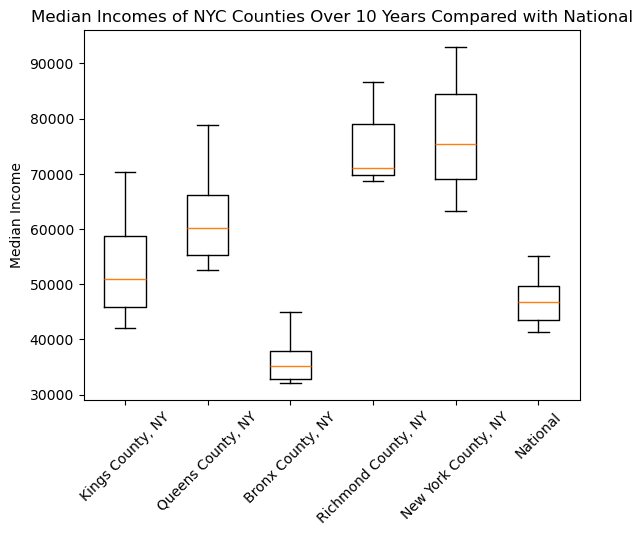

In [15]:
plt.boxplot(median_incomes.values())

plt.title('Median Incomes of NYC Counties Over 10 Years Compared with National')
plt.ylabel('Median Income')
plt.xticks(range(1, len(median_incomes) + 1), median_incomes.keys(), rotation = 45)

plt.show()

## Summary Stats

In [16]:
# Transpose rows and columns
transposed_income = nyc_income.T

# Set the new header
transposed_income.columns = transposed_income.iloc[0]

# Drop the original header row and reset the index
transposed_income = transposed_income.drop(transposed_income.index[0])
transposed_income.reset_index(drop=True, inplace=True)

transposed_income

Region Name,"Bronx County, NY","Kings County, NY","New York County, NY","Queens County, NY","Richmond County, NY"
0,32674.0,42047.0,63188.0,52486.0,69163.0
1,32137.0,42437.0,65833.0,53124.0,69436.0
2,32510.0,44850.0,66739.0,54373.0,70295.0
3,33079.0,47067.0,71443.0,56307.0,68621.0
4,33687.0,47547.0,75459.0,56866.0,70299.0
5,35102.0,51026.0,75136.0,60241.0,71058.0
6,37355.0,54793.0,77214.0,61844.0,75524.0
7,37377.0,56548.0,84133.0,64046.0,78466.0
8,38566.0,60862.0,84610.0,68432.0,79719.0
9,41470.0,66501.0,93007.0,72975.0,86624.0


In [17]:
#Summary Stats

county_stats = pd.DataFrame(median_incomes)

# Mean
means = county_stats.mean()
print("Means:")
print(means)

# Median
medians = county_stats.median()
print("\nMedians:")
print(medians)

# Variance
variances = county_stats.var()
print("\nVariances:")
print(variances)

# Standard Deviation
std_devs = county_stats.std()
print("\nStandard Deviations:")
print(std_devs)

# Standard Error of the Mean (SEM)
sems = county_stats.sem()
print("\nSEMs:")
print(sems)

Means:
Kings County, NY       53097.090909
Queens County, NY      61776.454545
Bronx County, NY       36260.272727
Richmond County, NY    74564.363636
New York County, NY    76773.363636
National               47075.454545
dtype: float64

Medians:
Kings County, NY       51026.0
Queens County, NY      60241.0
Bronx County, NY       35102.0
Richmond County, NY    71058.0
New York County, NY    75459.0
National               46807.0
dtype: float64

Variances:
Kings County, NY       9.289997e+07
Queens County, NY      7.386364e+07
Bronx County, NY       1.716628e+07
Richmond County, NY    3.691186e+07
New York County, NY    9.374424e+07
National               2.096660e+07
dtype: float64

Standard Deviations:
Kings County, NY       9638.462828
Queens County, NY      8594.395841
Bronx County, NY       4143.221502
Richmond County, NY    6075.513184
New York County, NY    9682.161094
National               4578.929468
dtype: float64

SEMs:
Kings County, NY       2906.105887
Queens County, NY  

In [18]:
#Summary stats dataframe

county_stats = pd.DataFrame({
                    'Means': means,
                    'Medians': medians,
                    'Variances': variances,
                    'Standard Deviations': std_devs,
                    'SEMS': sems})

df = pd.DataFrame(county_stats)

# Using the aggregation method, produce the same summary statistics in a single line

county_stats["Means"] = county_stats["Means"].map("${:,.2f}".format)

county_stats["Medians"] = county_stats["Medians"].map("${:,.2f}".format)

county_stats["Variances"] = county_stats["Variances"].map("{:,.2f}".format)

county_stats["Standard Deviations"] = county_stats["Standard Deviations"].map("{:,.2f}".format)

county_stats["SEMS"] = county_stats["SEMS"].map("{:,.2f}".format)


# Display the DataFrame

county_stats

,Means,Medians,Variances,Standard Deviations,SEMS
"Kings County, NY","$53,097.09","$51,026.00","92,899,965.69","9,638.46","2,906.11"
"Queens County, NY","$61,776.45","$60,241.00","73,863,639.87","8,594.40","2,591.31"
"Bronx County, NY","$36,260.27","$35,102.00","17,166,284.42","4,143.22","1,249.23"
"Richmond County, NY","$74,564.36","$71,058.00","36,911,860.45","6,075.51","1,831.84"
"New York County, NY","$76,773.36","$75,459.00","93,744,243.45","9,682.16","2,919.28"
National,"$47,075.45","$46,807.00","20,966,595.07","4,578.93","1,380.60"


## Change Year to Year

In [19]:
# Compute year-to-year changes for each county
yearly_changes = nyc_income.set_index('Region Name').diff(axis=1)

# Display the DataFrame containing year-to-year changes
yearly_changes

,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Region Name,,,,,,,,,,,
"Bronx County, NY",NaN,-537.0,373.0,569.0,608.0,1415.0,2253.0,22.0,1189.0,2904.0,3436.0
"Kings County, NY",NaN,390.0,2413.0,2217.0,480.0,3479.0,3767.0,1755.0,4314.0,5639.0,3889.0
"New York County, NY",NaN,2645.0,906.0,4704.0,4016.0,-323.0,2078.0,6919.0,477.0,8397.0,-5262.0
"Queens County, NY",NaN,638.0,1249.0,1934.0,559.0,3375.0,1603.0,2202.0,4386.0,4543.0,5872.0
"Richmond County, NY",NaN,273.0,859.0,-1674.0,1678.0,759.0,4466.0,2942.0,1253.0,6905.0,-5621.0


In [20]:
# Sample median income data for each county over 10 years
median_incomes_nyc = {
    'Kings County, NY': [42047, 42437,	44850,	47067,	47547,	51026,	54793,	56548,	60862,	66501,	70390],
    'Queens County, NY': [52486, 53124,	54373,	56307,	56866,	60241,	61844,	64046,	68432,	72975,	78847],
    'Bronx County, NY': [32674,	32137,	32510,	33079,	33687,	35102,	37355,	37377,	38566,	41470,	44906],
    'Richmond County, NY': [69163,	69436,	70295,	68621,	70299,	71058,	75524,	78466,	79719,	86624,	81003],
    'New York County, NY': [63188,	65833,	66739,	71443,	75459,	75136,	77214,	84133,	84610,	93007,	87745]
}

plt.show()

In [21]:
counties = ['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY']
years = list(range(2011, 2021))

# Sample median income data for each county over 10 years
median_income_change = {
    'Bronx County, NY': [-537,	373, 569, 608, 1415, 2253, 22,	1189, 2904, 3436],
    'Kings County, NY': [390, 2413,	2217,	480,	3479,	3767,	1755,	4314,	5639,	3889],
    'New York County, NY': [2645,	906,	4704,	4016,	-323,	2078,	6919,	477,	8397,	-5262],
    'Queens County, NY': [638,	1249,	1934,	559,	3375,	1603,	2202,	4386,	4543,	5872],
    'Richmond County, NY': [273,	859,	-1674,	1678,	759,	4466,	2942,	1253,	6905,	-5621]
}

plt.show()

In [22]:
counties = ['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY']
years = list(range(2011, 2021))

# Sample median income data for each county over 10 years
median_income_change = {
    'Bronx County, NY': [-537,	373, 569, 608, 1415, 2253, 22,	1189, 2904, 3436],
    'Kings County, NY': [390, 2413,	2217,	480,	3479,	3767,	1755,	4314,	5639,	3889],
    'New York County, NY': [2645,	906,	4704,	4016,	-323,	2078,	6919,	477,	8397,	-5262],
    'Queens County, NY': [638,	1249,	1934,	559,	3375,	1603,	2202,	4386,	4543,	5872],
    'Richmond County, NY': [273,	859,	-1674,	1678,	759,	4466,	2942,	1253,	6905,	-5621]
}

plt.show()

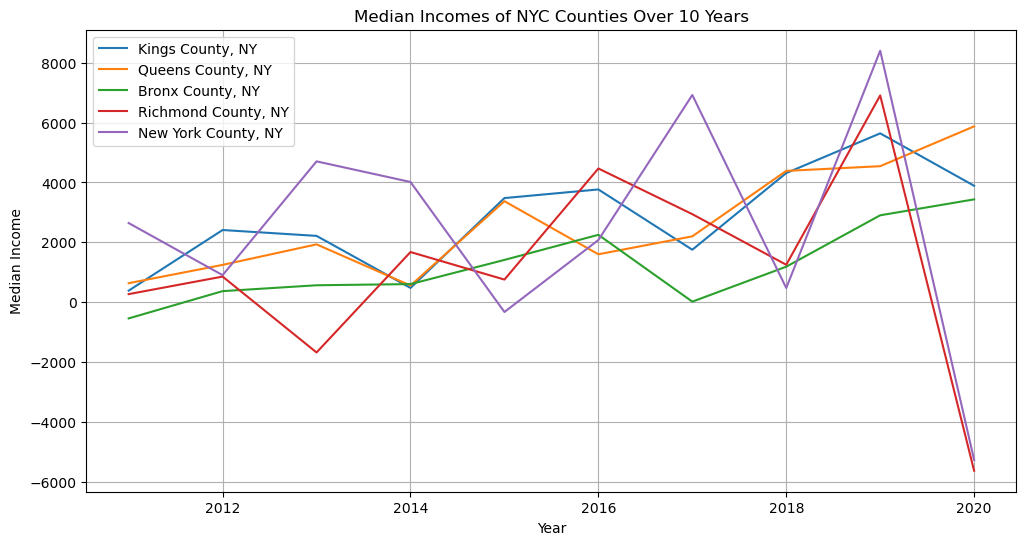

In [23]:
plt.figure(figsize=(12, 6))

for county in counties:
    plt.plot(years, median_income_change[county], label=county)

plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Incomes of NYC Counties Over 10 Years')
plt.legend()
plt.grid(True)
plt.show()

## Regression Lines

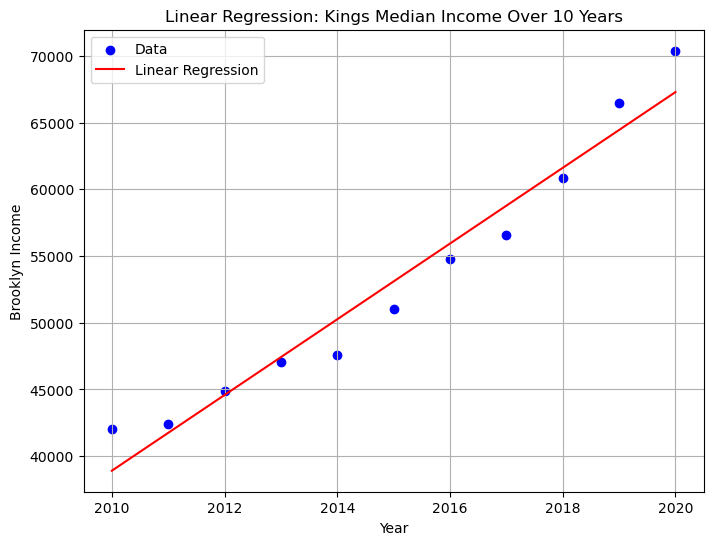

Slope: 2838.31818181809, Intercept: -5666114.045454361


In [24]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
brooklyn_income = np.array([42047, 42437,	44850,	47067,	47547,	51026,	54793,	56548,	60862,	66501,	70390])

# Perform linear regression
slope, intercept = np.polyfit(years, brooklyn_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, brooklyn_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Brooklyn Income')
plt.title('Linear Regression: Kings Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

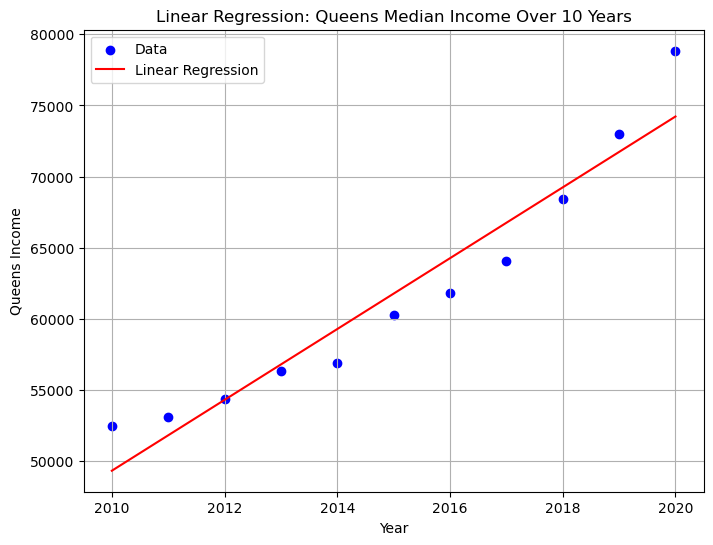

Slope: 2489.4727272726514, Intercept: -4954511.090908938


In [25]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
queens_income = np.array([52486, 53124,	54373,	56307,	56866,	60241,	61844,	64046,	68432,	72975,	78847])

# Perform linear regression
slope, intercept = np.polyfit(years, queens_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, queens_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Queens Income')
plt.title('Linear Regression: Queens Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

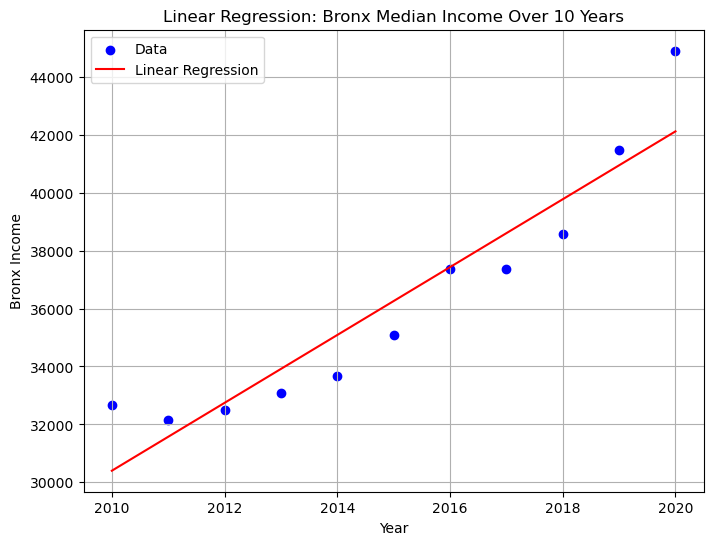

Slope: 1172.0363636363213, Intercept: -2325392.999999915


In [26]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
bronx_income = np.array([32674,	32137,	32510,	33079,	33687,	35102,	37355,	37377,	38566,	41470,	44906])

# Perform linear regression
slope, intercept = np.polyfit(years, bronx_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, bronx_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Bronx Income')
plt.title('Linear Regression: Bronx Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

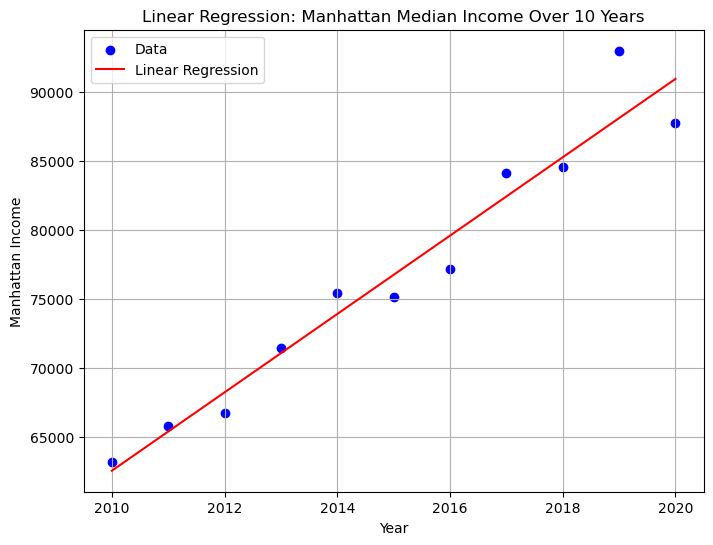

Slope: 2838.4454545453714, Intercept: -5642694.227272561


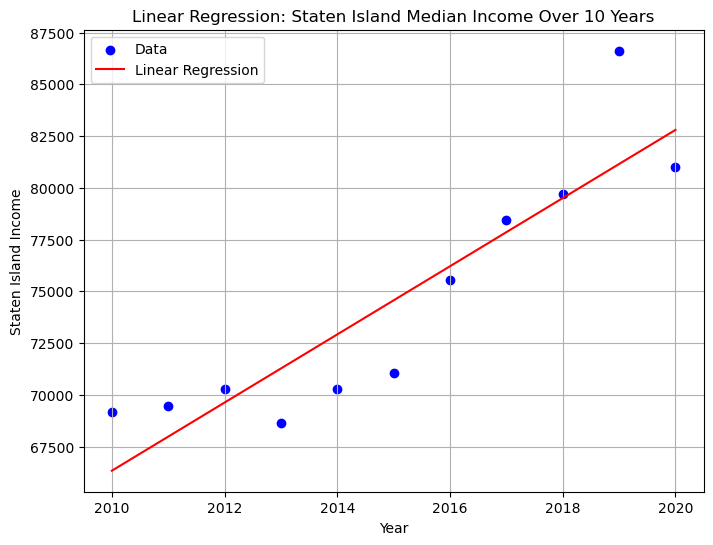

Slope: 1646.718181818118, Intercept: -3243572.7727271444


In [27]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
manhattan_income = np.array([63188,	65833,	66739,	71443,	75459,	75136,	77214,	84133,	84610,	93007,	87745])

# Perform linear regression
slope, intercept = np.polyfit(years, manhattan_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, manhattan_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Manhattan Income')
plt.title('Linear Regression: Manhattan Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
staten_island_income = np.array([69163,	69436,	70295,	68621,	70299,	71058,	75524,	78466,	79719,	86624,	81003])

# Perform linear regression
slope, intercept = np.polyfit(years, staten_island_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, staten_island_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Staten Island Income')
plt.title('Linear Regression: Staten Island Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

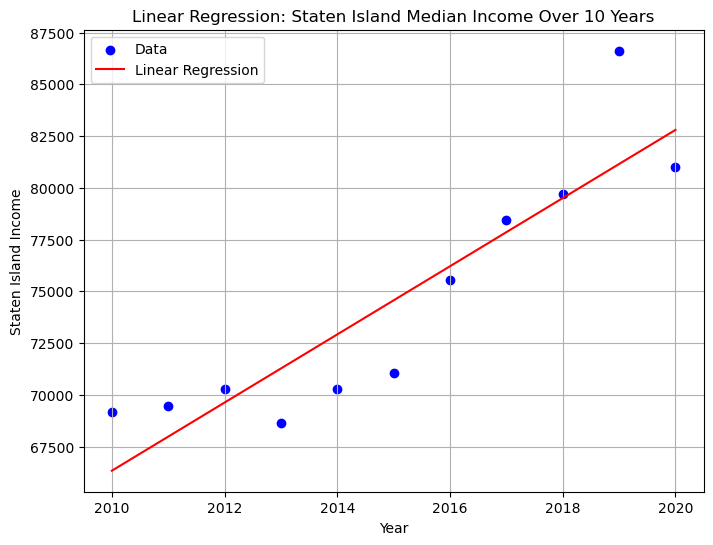

Slope: 1646.718181818118, Intercept: -3243572.7727271444


In [28]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
staten_island_income = np.array([69163,	69436,	70295,	68621,	70299,	71058,	75524,	78466,	79719,	86624,	81003])

# Perform linear regression
slope, intercept = np.polyfit(years, staten_island_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, staten_island_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Staten Island Income')
plt.title('Linear Regression: Staten Island Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

# Age Demographics

## Cleaning Census Data 2010

In [29]:
# Create a dictionary to map old column names to new column names
new_column_names = {'Label (Grouping)': 'Age Groups', 
                    'Bronx borough, Bronx County, New York!!Total!!Estimate': 'Bronx borough 2010',
                    'Brooklyn borough, Kings County, New York!!Total!!Estimate': 'Brooklyn borough 2010',
                    'Manhattan borough, New York County, New York!!Total!!Estimate' : 'Manhattan borough 2010',
                    'Queens borough, Queens County, New York!!Total!!Estimate' : 'Queens borough 2010',
                    'Staten Island borough, Richmond County, New York!!Total!!Estimate' : 'Staten Island borough 2010'
                   }

# Rename all columns using the dictionary
census_2010 = census_2010.rename(columns=new_column_names)
census_2010 = census_2010.dropna()
census_2010 = census_2010.drop(census_2010.index[19:])
census_2010.drop(0,inplace=True) 


total_population_bronx = 1365725
total_population_brooklyn = 2466782
total_population_manhathan = 1583345
total_population_queens = 2199169
total_population_stanten_island = 463450

census_2010['Bronx borough 2010'] = census_2010['Bronx borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Bronx Population 2010'] = (census_2010['Bronx borough 2010'] * total_population_bronx).astype(int)

census_2010['Brooklyn borough 2010'] = census_2010['Brooklyn borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Brooklyn Population 2010'] = (census_2010['Brooklyn borough 2010'] * total_population_brooklyn).astype(int)

census_2010['Manhattan borough 2010'] = census_2010['Manhattan borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Manhattan Population 2010'] = (census_2010['Manhattan borough 2010'] * total_population_manhathan).astype(int)

census_2010['Queens borough 2010'] = census_2010['Queens borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Queens Population 2010'] = (census_2010['Queens borough 2010'] * total_population_queens).astype(int)

census_2010['Staten Island borough 2010'] = census_2010['Staten Island borough 2010'].astype(str).str.rstrip('%').astype(float) / 100
census_2010['Staten Island Population 2010'] = (census_2010['Staten Island borough 2010'] * total_population_stanten_island).astype(int)

census_2010 = census_2010.drop(columns=census_2010.columns[1:6])

census_2010["Year"] = 2010
census_2010.columns = [col.replace(' 2010', '') for col in census_2010.columns]

## Cleaning Census Data 2020

In [30]:
# Create a dictionary to map old column names to new column names
new_column_names = {'Label (Grouping)': 'Age Groups', 
                    'Bronx borough, Bronx County, New York!!Total!!Estimate': 'Bronx Population 2020',
                    'Brooklyn borough, Kings County, New York!!Total!!Estimate': 'Brooklyn Population 2020',
                    'Manhattan borough, New York County, New York!!Total!!Estimate' : 'Manhattan Population 2020',
                    'Queens borough, Queens County, New York!!Total!!Estimate' : 'Queens Population 2020',
                    'Staten Island borough, Richmond County, New York!!Total!!Estimate' : 'Staten Island Population 2020'
                   }

# Rename all columns using the dictionary
census_2020 = census_2020.rename(columns=new_column_names)
census_2020 = census_2020.drop(census_2020.index[19:])
census_2020 = census_2020.dropna()
census_2020.drop(0,inplace=True) 

for col in census_2020.columns[1:]:
    census_2020[col] = census_2020[col].astype(str).str.replace(',', '').astype(int)

census_2020["Year"] = 2020
census_2020.columns = [col.replace(' 2020', '') for col in census_2020.columns]

## New Dataset

In [31]:
census_2010_2020 = pd.concat([census_2010, census_2020])
census_2010_2020

,Age Groups,Bronx Population,Brooklyn Population,Manhattan Population,Queens Population,Staten Island Population,Year
2,Under 5 years,103795,175141,79167,131950,28270,2010
3,5 to 9 years,99697,157874,61750,118755,29660,2010
4,10 to 14 years,102429,157874,60167,125352,31514,2010
5,15 to 19 years,114720,172674,79167,138547,32904,2010
6,20 to 24 years,107892,189942,136167,156140,30124,2010
7,25 to 29 years,105160,219543,183668,184730,30124,2010
8,30 to 34 years,95600,192408,155167,171535,29660,2010
9,35 to 39 years,91503,172674,128250,167136,32441,2010
10,40 to 44 years,99697,170207,114000,164937,35685,2010
11,45 to 49 years,95600,165274,104500,164937,36612,2010


Graphs

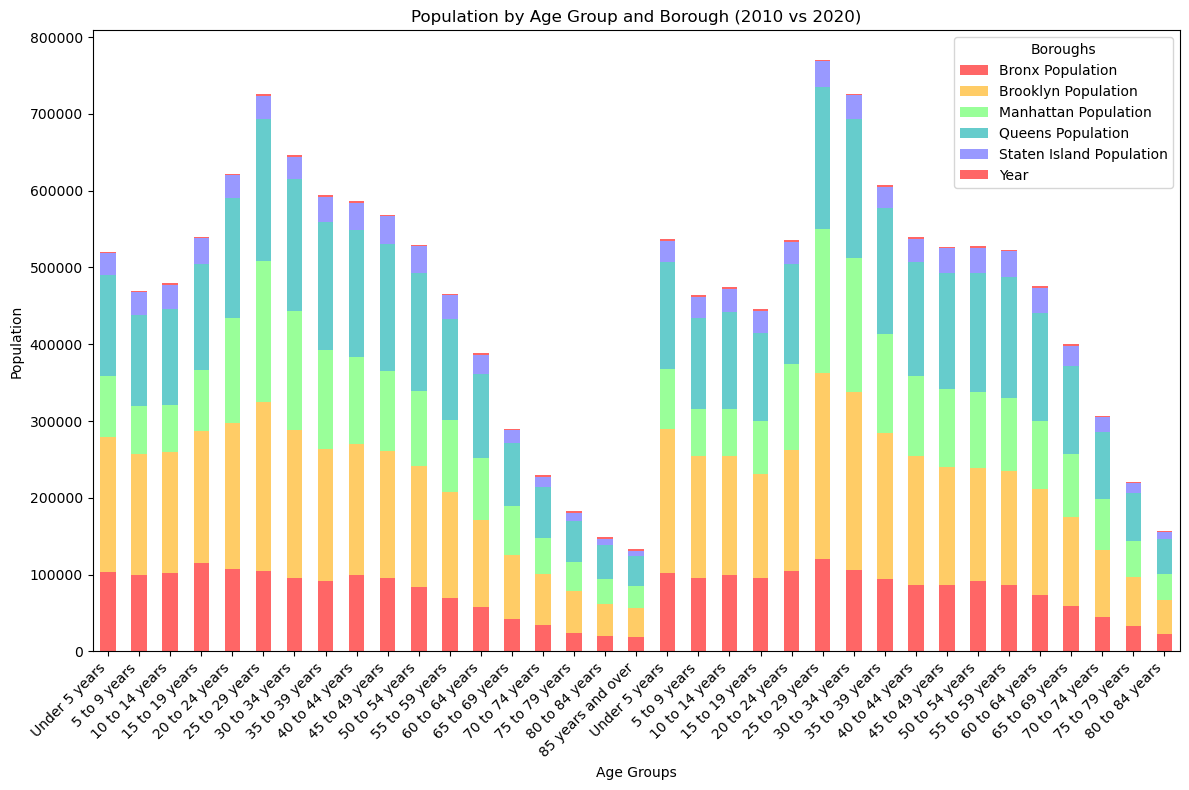

In [32]:
census_2010_2020.set_index('Age Groups', inplace=True)
pastel_colors = ['#FF6666', '#FFCC66', '#99FF99', '#66CCCC', '#9999FF']
census_2010_2020.plot(kind='bar', stacked=True, figsize=(12, 8),color=pastel_colors)
plt.title('Population by Age Group and Borough (2010 vs 2020)')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Boroughs')
plt.savefig('population_in_nyc_2010_vs_2020.png')
plt.tight_layout()
plt.show()

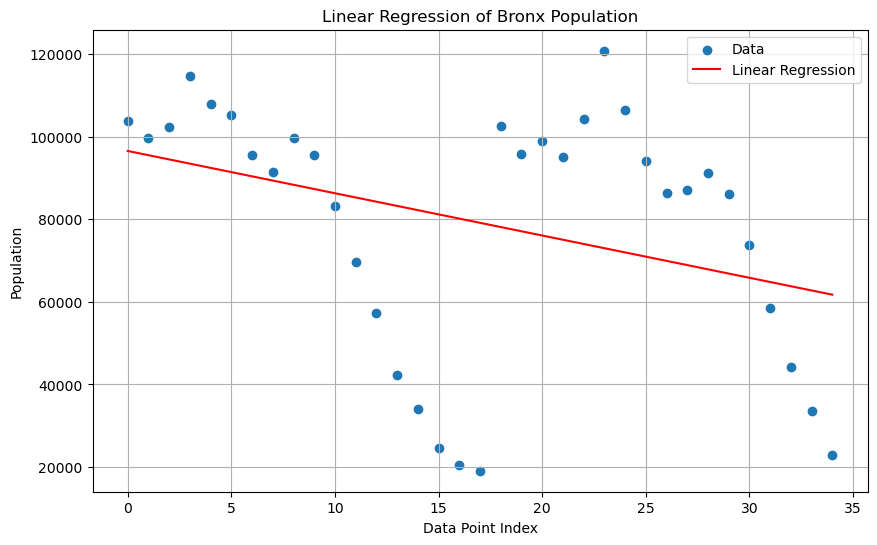

Slope: -1023.0599439775912
Intercept: 96515.9619047619
R-squared: 0.11872239524875607


In [33]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Bronx Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Bronx Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_bronx.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

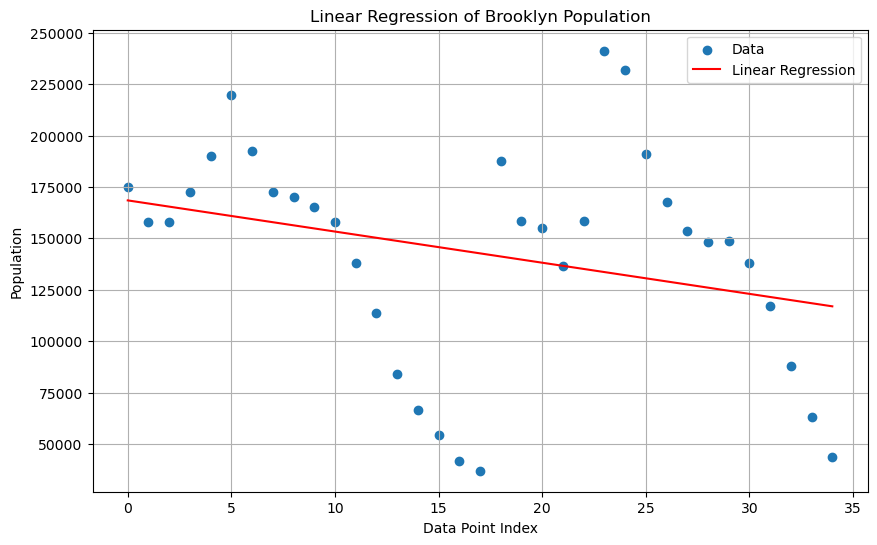

Slope: -1515.1330532212885
Intercept: 168461.31904761904
R-squared: 0.08368400918784712


In [34]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Brooklyn Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Brooklyn Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_brooklyn.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

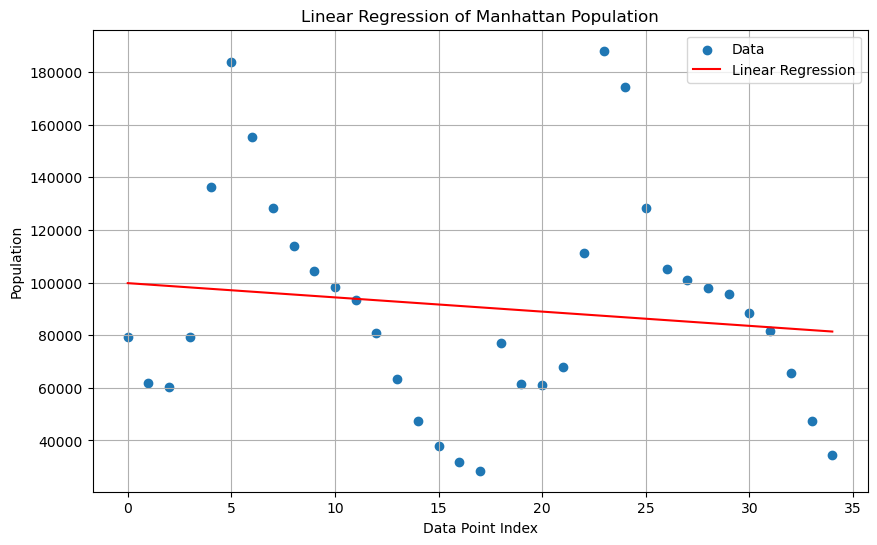

Slope: -541.0350140056023
Intercept: 99788.42380952381
R-squared: 0.0177517301792593


In [35]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Manhattan Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Manhattan Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_Manhattan.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

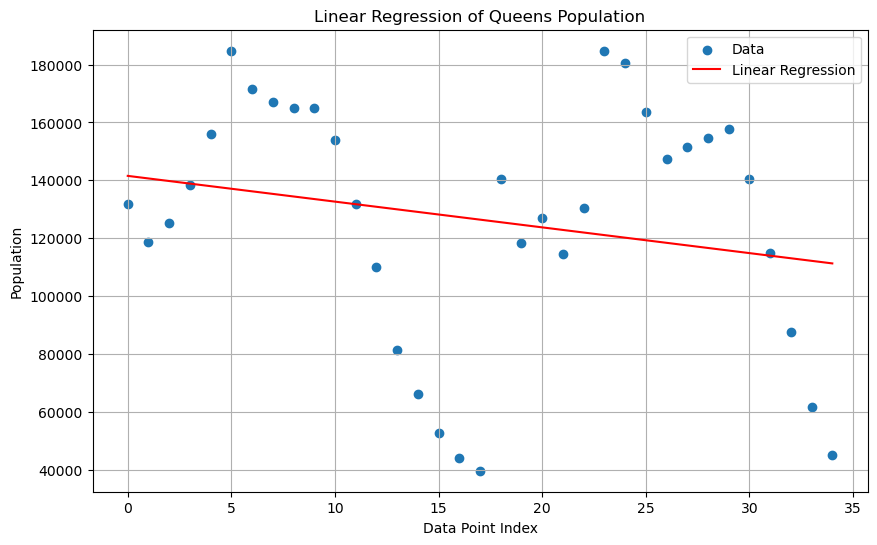

Slope: -890.2226890756303
Intercept: 141538.7
R-squared: 0.046139561880673315


In [36]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Queens Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Queens Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_Queens.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

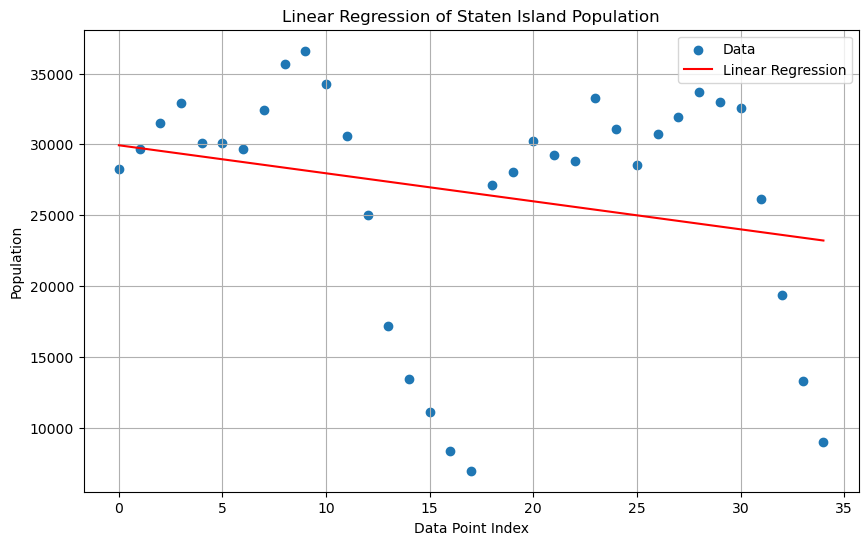

Slope: -197.84005602240896
Intercept: 29934.05238095238
R-squared: 0.0574127753255582


In [37]:
x = range(len(census_2010_2020))  # Use index as x values
y = census_2010_2020['Staten Island Population'].values  # Choose one borough for example
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')
plt.title('Linear Regression of Staten Island Population')
plt.xlabel('Data Point Index')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('linear_regresion_Staten_Island.png')
plt.show()

# Print the slope, intercept, and coefficient of determination (r-squared)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

In [43]:
#import pandas as pd

#Create the data
data = {
    'Rent': yearly_rent['Bronx'],
    'Income': transposed_income['Bronx County, NY']
}

#Define the index
index = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

#Create the DataFrame
df = pd.DataFrame(data, index=index)

# Display the DataFrame
print(df)

correlation = yearly_rent['Bronx'].corr(transposed_income['Bronx County, NY'])
print("Correlation between Rent and Income:", correlation)

#import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(yearly_rent['Bronx'], transposed_income['Bronx County, NY'])
plt.title('Correlation between Rent and Income')
plt.xlabel('Rent')
plt.ylabel('Income')
plt.grid(True)

# Displaying the plot
plt.show()

         Rent Income
2010  1562.08    NaN
2011  1492.83    NaN
2012  1485.33    NaN
2013  1497.92    NaN
2014  1533.25    NaN
2015  1534.92    NaN
2016  1652.50    NaN
2017  1736.08    NaN
2018  1868.33    NaN
2019  1920.42    NaN
2020  1974.33    NaN


NameError: name 'f' is not defined